In [1]:
from ModelB import *

In [ ]:
SAVE_PATH = r"E:\MS_ExperimentData\general"
model = Model(agentsNum=1000, J=0.5, K=0.05, r_c=0.5, dt=0.1, savePath=SAVE_PATH)
sa = StateAnalysis(model)

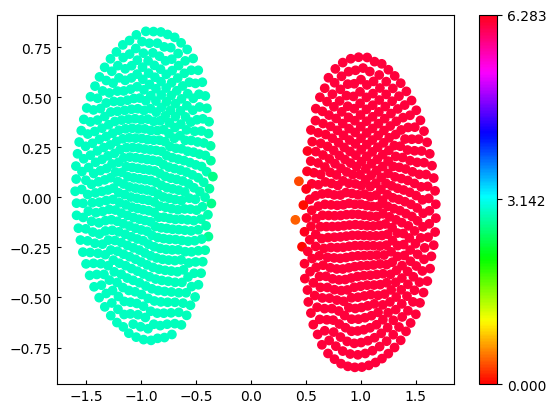

In [39]:
index = -1

maxAbsPos = np.max(np.abs(sa.totalPositionX)) 
positionX = sa.totalPositionX[index]
phaseTheta = sa.totalPhaseTheta[index]

ax1 = plt.subplot(1, 1, 1)
scatter = ax1.scatter(positionX[:, 0], positionX[:, 1], c=phaseTheta, cmap=cmap, clim=(0, 2*np.pi))
scatter.set_clim(0, 2*np.pi)

# ax1.set_xlim(-1.1*maxAbsPos, 1.1*maxAbsPos) 
# ax1.set_ylim(-1.1*maxAbsPos, 1.1*maxAbsPos) 
roundBound = np.round(maxAbsPos) # 四舍五入
# ax1.set_xticks([-roundBound, -roundBound / 2, 0, roundBound / 2, roundBound]) # 设置x轴刻度
# ax1.set_yticks([-roundBound, -roundBound / 2, 0, roundBound / 2, roundBound])   # 设置y轴刻度
# 刻度线向内
ax1.tick_params(axis='x', direction='in', length=3)
ax1.tick_params(axis='y', direction='in', length=3)

cbar = plt.colorbar(scatter, ticks=[0, np.pi, 2*np.pi], ax=ax1)

In [ ]:
tranPointTheta = sa.totalPointTheta[sa.transient_index:-1]
dotPhase = tranPointTheta.mean(axis=0)
phase = sa.tranPhaseTheta.mean(axis=0)

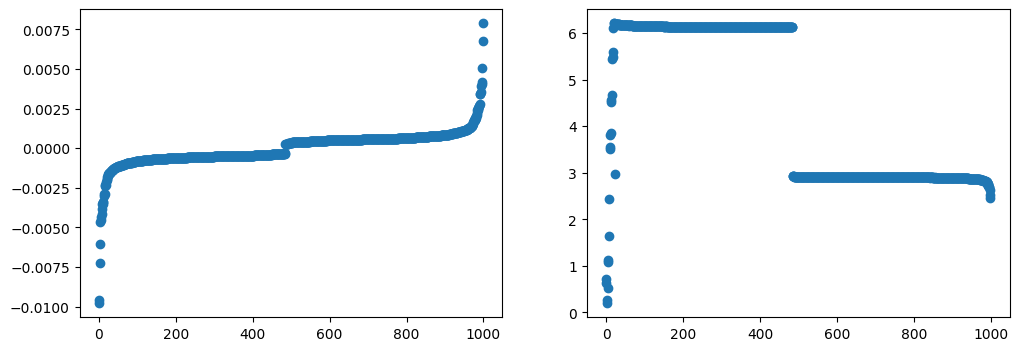

In [64]:
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 2, 1)
sort_indices = np.lexsort((phase, dotPhase))  # 先按b排序，b相同再按c排序
ax1.scatter(np.arange(model.agentsNum), dotPhase[sort_indices])

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(np.arange(model.agentsNum), phase[sort_indices])

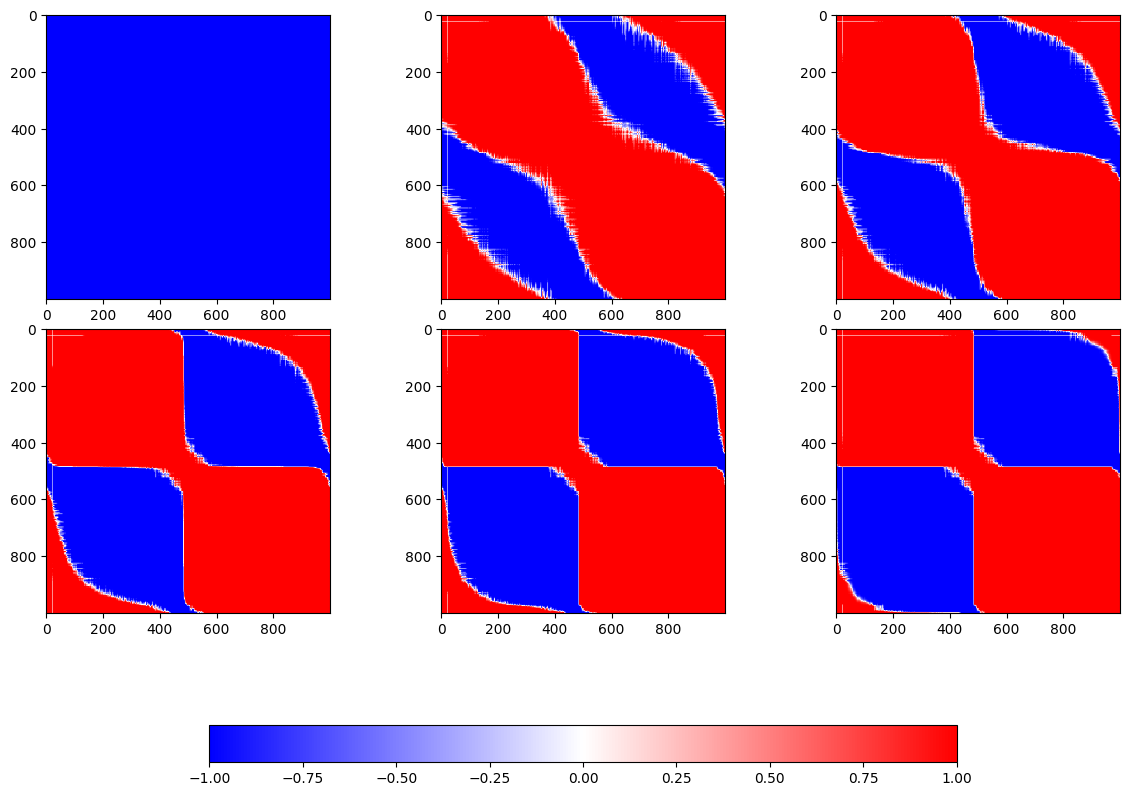

In [84]:
timeIdxs = np.linspace(0, sa.TNum - 1, 6).round().astype(int)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for axIdx, timeIdx in enumerate(timeIdxs):
    sortedAij = sa.totalAij[timeIdx][sort_indices, :][:, sort_indices]
    im = axs[axIdx].imshow(sortedAij, cmap="bwr")

plt.tight_layout()
fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05)